In [1]:
# One Independent and one dependent in linear regression
# more than one independent and one dependent in multiple regression
# one independent followed by degree and one dependent in polynomial regression
# Polynomial regression reduces the errors,
# or it minimizes the errors compared to linear and multiple regression.
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the dataset
# dataset = pd.read_csv('https://s3.us-west-2.amazonaws.com/public.gamelab.fun/da
dataset = pd.read_csv ('position_salaries.csv')
X = dataset.iloc[:, 1:2].values # level as a independent value
y = dataset.iloc[:, 2].values # salary as dependent value

In [2]:
print (dataset)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [3]:
print (X)
print (y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [5]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state =0)
print (X_train)
print (X_test)
print (y_train)
print (y_test)

[[ 5]
 [10]
 [ 2]
 [ 7]
 [ 8]
 [ 4]
 [ 1]
 [ 6]]
[[3]
 [9]]
[ 110000 1000000   50000  200000  300000   80000   45000  150000]
[ 60000 500000]


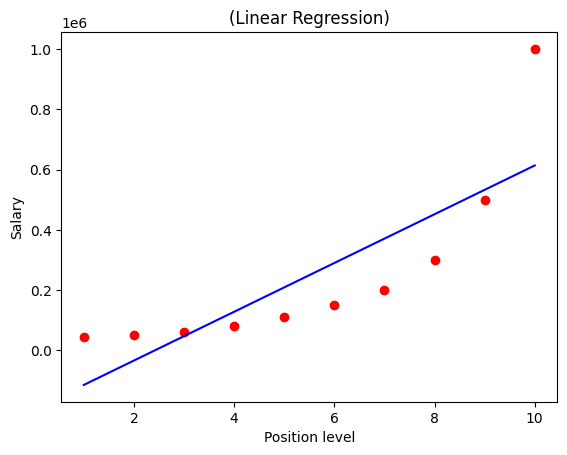

In [8]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('(Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()

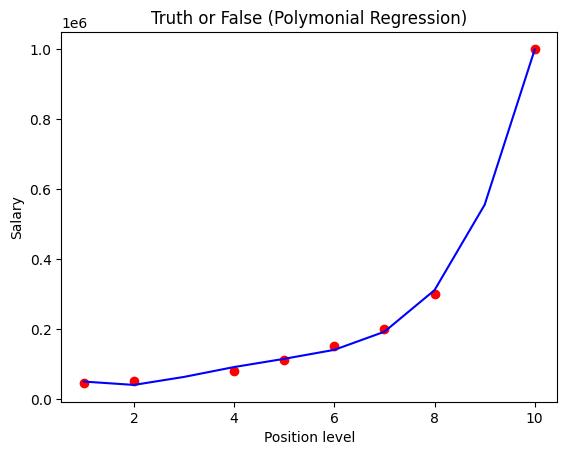

In [9]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
#Use this class to define the polynomial of the independent variable
poly_reg = PolynomialFeatures(degree=4) #defining the polynomial degree to the fe
X_poly = poly_reg.fit_transform(X_train)
# X contains the values of independent variable and it transform as per the polyn
# which contains the values of indepedent variables values folllowed by degree
# Fitting the model followed by the independent varibale which supports the polyn
# we get the new independent values in terms of degree
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y_train)
# our model will be fit towards the polynomial based values of the independent va
# Visualizing the Polymonial Regression results
def viz_polymonial():
    plt.scatter(X_train, y_train, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('Truth or False (Polymonial Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_polymonial()

In [10]:
print (X)
print (X_poly)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]]


In [11]:
# Predicting a new result with Linear Regression
#y_pred = lin_reg.predict(X_test) # Testing data set
lin_reg.predict([[8]])
# we will get the big difference between our predicted salary because of huge amount

array([451696.96969697])

In [12]:
accuracy = lin_reg.score(X_test,y_test)
print(accuracy*100,'%')

98.7371972922311 %


In [13]:
# Predicting a new result with Polymonial Regression
pol_reg.predict(poly_reg.fit_transform([[8]]))
# Now we are getting the salary of the employee at level 5.5 which is close to 5
# This is the reason we are using polynomial regression

array([310607.85933281])